<a href="https://colab.research.google.com/github/Greeshmasindhu24/Number-Digit-Classification/blob/main/4_NumericalDigitPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Missing values in each column:
label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

Data shapes:
X: (42000, 784)
y: (42000,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/9
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7366 - loss: 0.8387 - val_accuracy: 0.9430 - val_loss: 0.1987
Epoch 2/9
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9251 - loss: 0.2376 - val_accuracy: 0.9577 - val_loss: 0.1430
Epoch 3/9
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9515 - loss: 0.1599 - val_accuracy: 0.9680 - val_loss: 0.1144
Epoch 4/9
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9613 - loss: 0.1243 - val_accuracy: 0.9638 - val_loss: 0.1280
Epoch 5/9
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9624 - loss: 0.1169 - val_accuracy: 0.9704 - val_loss: 0.1087
Epoch 6/9
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9704 - loss: 0.0928 - val_accuracy: 0.9683 - val_loss: 0.1137
Epoch 7/9
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9716 - loss: 0.0873 - val_accuracy: 0.9690 - val_loss: 0.1071
Epoch 8/9
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9752 - loss: 0.0770 - val_accuracy: 0.9722 - v

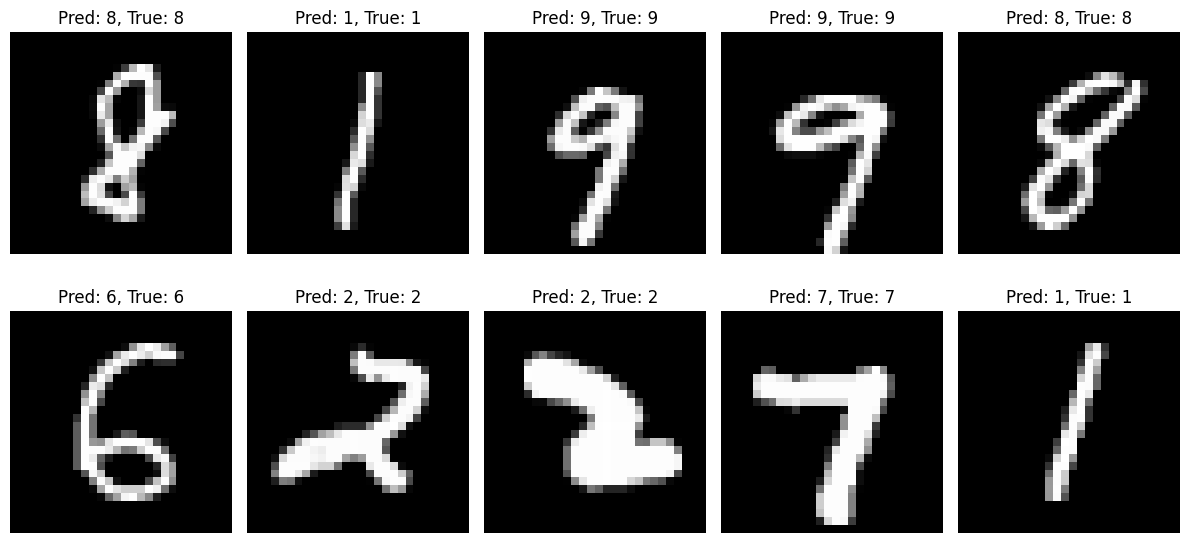

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load your custom dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the data from your CSV file
data = pd.read_csv("/content/drive/MyDrive/Hands on/train.csv")

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

X = data.drop('label', axis=1).values  # Pixel values
y = data['label'].values  # Labels

X = X.astype('float32') / 255.0

# Print data shapes
print("\nData shapes:")
print(f"X: {X.shape}")
print(f"y: {y.shape}")

# One-hot encode labels
y = to_categorical(y, num_classes=10)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(x_train)
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train,
                    epochs=9,
                    batch_size=64,
                    validation_split=0.2)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Metrics
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

'''print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))'''


# Visualize some predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    # Reshape images from 784 pixels to 28x28 for visualization
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]}, True: {y_true[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
